In [1]:
import pandas as pd
import numpy as np
import pandas_ta
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#### Dataframe of AAPL stock

In [85]:
df = pd.read_csv("cleaned_data.csv")
df_aapl = df[df['RIC']=='AAPL.O']
df_aapl.head(390)

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
0,0,2020-09-01 13:30:00+00:00,2020-09-01,09:30:00,AAPL.O,132.760,132.92,131.49,131.6700,132.656,7032,5143217.0
1,1,2020-09-01 13:31:00+00:00,2020-09-01,09:31:00,AAPL.O,131.710,132.00,131.32,131.6852,131.696,4657,1089138.0
2,2,2020-09-01 13:32:00+00:00,2020-09-01,09:32:00,AAPL.O,131.660,132.00,131.13,131.8100,131.554,4668,1062337.0
3,3,2020-09-01 13:33:00+00:00,2020-09-01,09:33:00,AAPL.O,131.810,131.83,130.81,130.9047,131.158,5074,1147498.0
4,4,2020-09-01 13:34:00+00:00,2020-09-01,09:34:00,AAPL.O,130.910,131.39,130.89,131.3300,131.134,4179,915152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,2020-09-01 19:55:00+00:00,2020-09-01,15:55:00,AAPL.O,133.730,133.92,133.70,133.9019,133.821,1870,398990.0
386,386,2020-09-01 19:56:00+00:00,2020-09-01,15:56:00,AAPL.O,133.905,134.15,133.84,134.1100,134.043,2463,654453.0
387,387,2020-09-01 19:57:00+00:00,2020-09-01,15:57:00,AAPL.O,134.115,134.40,134.11,134.3500,134.272,2744,672830.0
388,388,2020-09-01 19:58:00+00:00,2020-09-01,15:58:00,AAPL.O,134.350,134.49,134.31,134.4450,134.401,3508,909836.0


In [86]:
df_aapl

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
0,0,2020-09-01 13:30:00+00:00,2020-09-01,09:30:00,AAPL.O,132.760,132.92,131.490,131.6700,132.656,7032,5143217.0
1,1,2020-09-01 13:31:00+00:00,2020-09-01,09:31:00,AAPL.O,131.710,132.00,131.320,131.6852,131.696,4657,1089138.0
2,2,2020-09-01 13:32:00+00:00,2020-09-01,09:32:00,AAPL.O,131.660,132.00,131.130,131.8100,131.554,4668,1062337.0
3,3,2020-09-01 13:33:00+00:00,2020-09-01,09:33:00,AAPL.O,131.810,131.83,130.810,130.9047,131.158,5074,1147498.0
4,4,2020-09-01 13:34:00+00:00,2020-09-01,09:34:00,AAPL.O,130.910,131.39,130.890,131.3300,131.134,4179,915152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
98307,98307,2021-09-01 19:55:00+00:00,2021-09-01,15:55:00,AAPL.O,152.430,152.46,152.385,152.4400,152.428,2355,487520.0
98308,98308,2021-09-01 19:56:00+00:00,2021-09-01,15:56:00,AAPL.O,152.440,152.47,152.420,152.4400,152.445,2084,356602.0
98309,98309,2021-09-01 19:57:00+00:00,2021-09-01,15:57:00,AAPL.O,152.450,152.47,152.400,152.4600,152.438,1869,339385.0
98310,98310,2021-09-01 19:58:00+00:00,2021-09-01,15:58:00,AAPL.O,152.460,152.50,152.430,152.4801,152.461,2263,512189.0


#### Data Preprocessing

In [87]:
df_aapl['BarTime'] = pd.to_datetime(df_aapl['BarTime'])

<ipython-input-87-bfc39d0ad4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['BarTime'] = pd.to_datetime(df_aapl['BarTime'])


In [88]:
df_aapl.drop(columns = ['Time', 'Date'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98312 entries, 0 to 98311
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      98312 non-null  int64              
 1   BarTime         98312 non-null  datetime64[ns, UTC]
 2   RIC             98312 non-null  object             
 3   Open            98312 non-null  float64            
 4   High            98312 non-null  float64            
 5   Low             98312 non-null  float64            
 6   Close           98312 non-null  float64            
 7   VWAP            98312 non-null  float64            
 8   NumberOfTrades  98312 non-null  int64              
 9   Volume          98312 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(1)
memory usage: 8.3+ MB


In [90]:
df_aapl['Date'] = df_aapl['BarTime'].dt.date
df_aapl['Time'] = df_aapl['BarTime'].dt.time

<ipython-input-90-571996609607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['Date'] = df_aapl['BarTime'].dt.date
<ipython-input-90-571996609607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['Time'] = df_aapl['BarTime'].dt.time


In [91]:
df_aapl

,Unnamed: 0,BarTime,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume,Date,Time
0,0,2020-09-01 13:30:00+00:00,AAPL.O,132.760,132.92,131.490,131.6700,132.656,7032,5143217.0,2020-09-01,13:30:00
1,1,2020-09-01 13:31:00+00:00,AAPL.O,131.710,132.00,131.320,131.6852,131.696,4657,1089138.0,2020-09-01,13:31:00
2,2,2020-09-01 13:32:00+00:00,AAPL.O,131.660,132.00,131.130,131.8100,131.554,4668,1062337.0,2020-09-01,13:32:00
3,3,2020-09-01 13:33:00+00:00,AAPL.O,131.810,131.83,130.810,130.9047,131.158,5074,1147498.0,2020-09-01,13:33:00
4,4,2020-09-01 13:34:00+00:00,AAPL.O,130.910,131.39,130.890,131.3300,131.134,4179,915152.0,2020-09-01,13:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...
98307,98307,2021-09-01 19:55:00+00:00,AAPL.O,152.430,152.46,152.385,152.4400,152.428,2355,487520.0,2021-09-01,19:55:00
98308,98308,2021-09-01 19:56:00+00:00,AAPL.O,152.440,152.47,152.420,152.4400,152.445,2084,356602.0,2021-09-01,19:56:00
98309,98309,2021-09-01 19:57:00+00:00,AAPL.O,152.450,152.47,152.400,152.4600,152.438,1869,339385.0,2021-09-01,19:57:00
98310,98310,2021-09-01 19:58:00+00:00,AAPL.O,152.460,152.50,152.430,152.4801,152.461,2263,512189.0,2021-09-01,19:58:00


In [92]:
df_aapl.drop(columns = ['Unnamed: 0', 'RIC', 'Open', 'High', 'Low', 'VWAP', 'NumberOfTrades'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Constructing Training set with prices only upto 3:50:00 PM

In [93]:
df_aapl = df_aapl.set_index(['BarTime'])
df_aapl_train = df_aapl.between_time('10:30:00', '19:50:00')

In [94]:
df_aapl_train

,Close,Volume,Date,Time
BarTime,,,,
2020-09-01 13:30:00+00:00,131.6700,5143217.0,2020-09-01,13:30:00
2020-09-01 13:31:00+00:00,131.6852,1089138.0,2020-09-01,13:31:00
2020-09-01 13:32:00+00:00,131.8100,1062337.0,2020-09-01,13:32:00
2020-09-01 13:33:00+00:00,130.9047,1147498.0,2020-09-01,13:33:00
2020-09-01 13:34:00+00:00,131.3300,915152.0,2020-09-01,13:34:00
...,...,...,...,...
2021-09-01 19:46:00+00:00,152.5950,169267.0,2021-09-01,19:46:00
2021-09-01 19:47:00+00:00,152.6050,182479.0,2021-09-01,19:47:00
2021-09-01 19:48:00+00:00,152.5616,139388.0,2021-09-01,19:48:00


In [95]:
df_aapl_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90773 entries, 2020-09-01 13:30:00+00:00 to 2021-09-01 19:50:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   90773 non-null  float64
 1   Volume  90773 non-null  float64
 2   Date    90773 non-null  object 
 3   Time    90773 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.5+ MB


#### Adding a 20 Day MA component

In [96]:
df_aapl_train.ta.ema(close='Close', length=7620, append=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


BarTime
2020-09-01 13:30:00+00:00           NaN
2020-09-01 13:31:00+00:00           NaN
2020-09-01 13:32:00+00:00           NaN
2020-09-01 13:33:00+00:00           NaN
2020-09-01 13:34:00+00:00           NaN
                                ...    
2021-09-01 19:46:00+00:00    148.988004
2021-09-01 19:47:00+00:00    148.988954
2021-09-01 19:48:00+00:00    148.989891
2021-09-01 19:49:00+00:00    148.990835
2021-09-01 19:50:00+00:00    148.991761
Name: EMA_7620, Length: 90773, dtype: float64

In [97]:
df_aapl_train = df_aapl_train.iloc[7620:]

In [98]:
df_aapl_train

,Close,Volume,Date,Time,EMA_7620
BarTime,,,,,
2020-09-30 13:30:00+00:00,114.2550,1493215.0,2020-09-30,13:30:00,115.220187
2020-09-30 13:31:00+00:00,114.3000,416822.0,2020-09-30,13:31:00,115.219945
2020-09-30 13:32:00+00:00,114.4099,495200.0,2020-09-30,13:32:00,115.219733
2020-09-30 13:33:00+00:00,114.5149,417078.0,2020-09-30,13:33:00,115.219548
2020-09-30 13:34:00+00:00,114.4889,341139.0,2020-09-30,13:34:00,115.219356
...,...,...,...,...,...
2021-09-01 19:46:00+00:00,152.5950,169267.0,2021-09-01,19:46:00,148.988004
2021-09-01 19:47:00+00:00,152.6050,182479.0,2021-09-01,19:47:00,148.988954
2021-09-01 19:48:00+00:00,152.5616,139388.0,2021-09-01,19:48:00,148.989891


In [99]:
df_aapl_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83153 entries, 2020-09-30 13:30:00+00:00 to 2021-09-01 19:50:00+00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     83153 non-null  float64
 1   Volume    83153 non-null  float64
 2   Date      83153 non-null  object 
 3   Time      83153 non-null  object 
 4   EMA_7620  83153 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.8+ MB


#### Keeping only the price at 3:50 PM for prediction of auction price (Along with MA component and Volume)

In [100]:
df_train_ema = df_aapl_train.at_time('19:50:00')

In [101]:
df_train_ema

,Close,Volume,Date,Time,EMA_7620
BarTime,,,,,
2020-09-30 19:50:00+00:00,116.2900,614268.0,2020-09-30,19:50:00,115.306964
2020-10-01 19:50:00+00:00,116.5000,635953.0,2020-10-01,19:50:00,115.420379
2020-10-02 19:50:00+00:00,113.4106,464342.0,2020-10-02,19:50:00,115.288350
2020-10-05 19:50:00+00:00,116.4750,472211.0,2020-10-05,19:50:00,115.302227
2020-10-06 19:50:00+00:00,112.9700,582256.0,2020-10-06,19:50:00,115.250599
...,...,...,...,...,...
2021-08-26 19:50:00+00:00,147.7800,174111.0,2021-08-26,19:50:00,147.564636
2021-08-27 19:50:00+00:00,148.5050,322826.0,2021-08-27,19:50:00,147.629925
2021-08-30 19:50:00+00:00,153.1500,333186.0,2021-08-30,19:50:00,148.087884


#### Reading the auction price data (Dependent Variable) 

In [103]:
df_y = pd.read_csv("NSQ_OneYear100closeA_Sept21.csv")

In [104]:
aapl_y = df_y[df_y['RIC']=='AAPL.O']

In [105]:
aapl_y = aapl_y.loc[20:]

In [106]:
aapl_y['Local_Date_Time'] = pd.to_datetime(aapl_y['Local_Date_Time'])
aapl_y['Date'] = aapl_y['Local_Date_Time'].dt.date

In [107]:
aapl_y

,Local_Date_Time,RIC,Price,Volume,Date
20,2020-09-30,AAPL.O,115.81,13761886,2020-09-30
21,2020-10-01,AAPL.O,116.79,7686070,2020-10-01
22,2020-10-02,AAPL.O,113.02,6272006,2020-10-02
23,2020-10-05,AAPL.O,116.50,5362483,2020-10-05
24,2020-10-06,AAPL.O,113.16,6460984,2020-10-06
...,...,...,...,...,...
248,2021-08-26,AAPL.O,147.54,2776138,2021-08-26
249,2021-08-27,AAPL.O,148.60,5199571,2021-08-27
250,2021-08-30,AAPL.O,153.12,3851460,2021-08-30
251,2021-08-31,AAPL.O,151.83,12475728,2021-08-31


In [109]:
##### NOTE: As there is a difference of 2 rows in the two datasets, checking which days are missing

In [110]:
training_set = set(df_train_ema['Date'])
y_set = set(aapl_y['Date'])

In [111]:
y_set-training_set

{datetime.date(2020, 11, 27), datetime.date(2020, 12, 24)}

In [112]:
df_train_ema.columns

Index(['Close', 'Volume', 'Date', 'Time', 'EMA_7620'], dtype='object')

In [113]:
import datetime
aapl_y = aapl_y[aapl_y.Date != datetime.date(2020, 11, 24)]
aapl_y = aapl_y[aapl_y.Date != datetime.date(2020, 11, 27)]

In [114]:
final_df = df_train_ema[['Volume', 'Close', 'EMA_7620']]
final_df.reset_index(inplace=True)

In [115]:
aapl_y.reset_index(inplace=True)
final_df['Auction_Price'] = aapl_y['Price']

#### Constructing final df

In [116]:
final_df

,BarTime,Volume,Close,EMA_7620,Auction_Price
0,2020-09-30 19:50:00+00:00,614268.0,116.2900,115.306964,115.81
1,2020-10-01 19:50:00+00:00,635953.0,116.5000,115.420379,116.79
2,2020-10-02 19:50:00+00:00,464342.0,113.4106,115.288350,113.02
3,2020-10-05 19:50:00+00:00,472211.0,116.4750,115.302227,116.50
4,2020-10-06 19:50:00+00:00,582256.0,112.9700,115.250599,113.16
...,...,...,...,...,...
226,2021-08-26 19:50:00+00:00,174111.0,147.7800,147.564636,147.54
227,2021-08-27 19:50:00+00:00,322826.0,148.5050,147.629925,148.60
228,2021-08-30 19:50:00+00:00,333186.0,153.1500,148.087884,153.12
229,2021-08-31 19:50:00+00:00,992182.0,151.9250,148.474081,151.83


#### Simple Linear Regression Model

In [117]:
X_train, X_test, y_train, y_test = train_test_split(final_df[['Close','EMA_7620']], final_df[['Auction_Price']], /
                                                    test_size=.2, shuffle = False)

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[ 1.00802573 -0.0176536 ]]
Mean Absolute Error: 0.20341724915103618
Coefficient of Determination: 0.9959839772267131


In [121]:
df_pred = pd.DataFrame()

In [122]:
predicted = []
for i in range(len(y_pred)):
    predicted.append(y_pred[i][0])
df_pred['Predicted'] = predicted
df_pred['Expected'] = y_test['Auction_Price'].values

#### Plotting Actual v/s Expected Auction Price

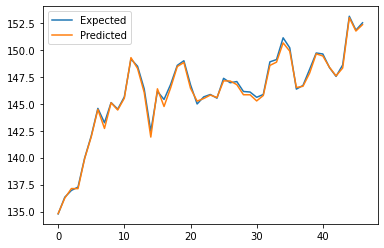

In [128]:
import matplotlib.pyplot as plt

plt.plot(df_pred['Expected'], label = 'Expected')
plt.plot(df_pred['Predicted'], label = 'Predicted')
plt.legend()

#### Plotting the Mean Absolute Errors:

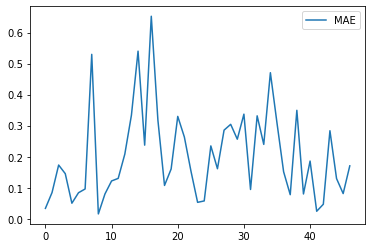

In [129]:
plt.plot(np.abs(df_pred['Predicted'] - df_pred['Expected']), label = 'MAE')
plt.legend()